In [1]:

import os
current_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(current_dir, '../../../1. Explorative Analysis & Preprocessing/nasiba/'))

os.chdir(src_path) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from textblob import TextBlob
import nltk
import re
import string
import emoji

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from collections import Counter
from spellchecker import SpellChecker

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import os
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from textblob import Word, TextBlob
pd.set_option('display.max_colwidth', None)
spell = SpellChecker()
from PIL import Image

In [4]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/train.csv'))
df_origin = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)
filepath_name = os.path.abspath(os.path.join(src_path, 'data/train_cleaned.csv'))
df_cleaned = pd.read_csv(filepath_name, encoding='utf-8')

source_filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/test.csv'))
df_origin_test = pd.read_csv(source_filepath_name_test, encoding='utf-8', index_col=0)
filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/test_cleaned.csv'))
df_cleaned_test = pd.read_csv(filepath_name_test, encoding='utf-8', index_col=0)

In [3]:
src_path

'c:\\Users\\Nasiba\\Documents\\Repos_Clones\\WebScience24\\src\\1. Explorative Analysis & Preprocessing\\nasiba'

In [6]:
filepath_name

'c:\\Users\\Nasiba\\Documents\\Repos_Clones\\WebScience24\\src\\1. Explorative Analysis & Preprocessing\\nasiba\\data\\train_cleaned.csv'

In [8]:
df_cleaned.head(5)

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father selfish drag kid run,1,['#run'],NaN
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use cause offer van,2,"['#lyft', '#disapointed', '#getthanked']",NaN
2,3,0,bihday your majesty,bihday majesty,0,[],NaN
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model take time mobile phone kissing sunglass mouth tongue sweat droplet sweat droplet sweat droplet,0,['#model'],":mobile_phone:,:kissing_face_with_smiling_eyes:,:smiling_face_with_sunglasses:,:mouth:,:tongue:,:sweat_droplets:,:sweat_droplets:,:sweat_droplets:"
4,5,0,factsguide: society now #motivation,factsguide society motivation,0,['#motivation'],NaN


#### Datenumfang

In [5]:
print("Anzahl Datensätze der unbereinigten Traindaten")
print(df_origin.tweet.count())
print("Anzahl Datensätze der bereinigten Traindaten")
print(df_cleaned.tweet.count())
print("Anzahl der entfernten Datensätze während Cleaning")
print(df_cleaned.tweet.count() - df_origin.tweet.count())
print("Anteil der entfernten Datensätze während Cleaning")
print((df_cleaned.tweet.count() / df_origin.tweet.count() - 1) * 100)

Anzahl Datensätze der unbereinigten Traindaten
31962
Anzahl Datensätze der bereinigten Traindaten
27611
Anzahl der entfernten Datensätze während Cleaning
-4351
Anteil der entfernten Datensätze während Cleaning
-13.613040485576622


In [6]:
print(df_origin[df_origin.label == 1].count())
print(df_cleaned[df_cleaned.label == 1].count())
print(df_cleaned[df_cleaned.label == 1].count() - df_origin[df_origin.label == 1].count())
print((df_cleaned[df_cleaned.label == 1].count() / df_origin[df_origin.label == 1].count() - 1) * 100)

label    2242
tweet    2242
dtype: int64
id               1805
label            1805
tweet            1805
tweet_cleaned    1805
user_handle      1805
hashtags         1805
emojis             92
dtype: int64
emojis             NaN
hashtags           NaN
id                 NaN
label           -437.0
tweet           -437.0
tweet_cleaned      NaN
user_handle        NaN
dtype: float64
emojis                 NaN
hashtags               NaN
id                     NaN
label           -19.491525
tweet           -19.491525
tweet_cleaned          NaN
user_handle            NaN
dtype: float64


#### Label Verteilung bereinigte vs. unbereinigte Datensätze

In [7]:
# Klassenverteilung in den ursprünglichen Trainingsdaten
train_label_counts = df_origin['label'].value_counts()
print("Klassenverteilung in den ursprünglichen Trainingsdaten:")
print(train_label_counts)

# Klassenverteilung in den bereinigten Trainingsdaten
train_cleaned_label_counts = df_cleaned['label'].value_counts()
print("\nKlassenverteilung in den bereinigten Trainingsdaten:")
print(train_cleaned_label_counts)


Klassenverteilung in den ursprünglichen Trainingsdaten:
label
0    29720
1     2242
Name: count, dtype: int64

Klassenverteilung in den bereinigten Trainingsdaten:
label
0    25806
1     1805
Name: count, dtype: int64


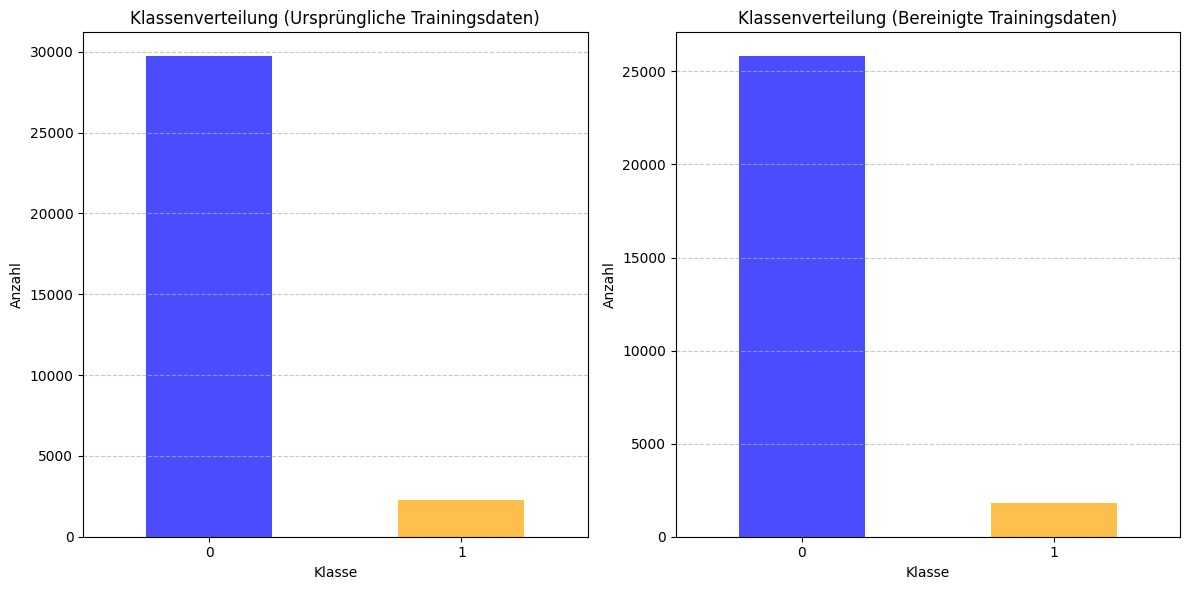

In [8]:
# Visualisierung der Klassenverteilung
plt.figure(figsize=(12, 6))

# Originale Daten
plt.subplot(1, 2, 1)
train_label_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Klassenverteilung (Ursprüngliche Trainingsdaten)')
plt.xlabel('Klasse')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bereinigte Daten
plt.subplot(1, 2, 2)
train_cleaned_label_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Klassenverteilung (Bereinigte Trainingsdaten)')
plt.xlabel('Klasse')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Statistiken der Train Daten vs. Test Daten

In [10]:
# Berechnung der Länge der Tweets
train_data_len = df_origin['tweet'].str.len()
test_data_len = df_origin_test['tweet'].str.len()

train_cleaned_data_len = df_cleaned['tweet_cleaned'].str.len()
test_cleaned_data_len = df_cleaned_test['tweet_cleaned'].str.len()

# Statistiken für Trainingsdaten
print("Statistiken zur Länge der Trainingsdaten:")
print(f"Durchschnittliche Länge: {train_data_len.mean():.2f}")
print(f"Median der Länge: {train_data_len.median():.2f}")
print(f"Minimale Länge: {train_data_len.min()}")
print(f"Maximale Länge: {train_data_len.max()}")
print(f"Standardabweichung: {train_data_len.std():.2f}\n")

# Statistiken für Testdaten
print("Statistiken zur Länge der Testdaten:")
print(f"Durchschnittliche Länge: {test_data_len.mean():.2f}")
print(f"Median der Länge: {test_data_len.median():.2f}")
print(f"Minimale Länge: {test_data_len.min()}")
print(f"Maximale Länge: {test_data_len.max()}")
print(f"Standardabweichung: {test_data_len.std():.2f} \n")

# Statistiken für bereinigte Trainingsdaten
print("Statistiken zur Länge der bereinigten Trainingsdaten:")
print(f"Durchschnittliche Länge: {train_cleaned_data_len.mean():.2f}")
print(f"Median der Länge: {train_cleaned_data_len.median():.2f}")
print(f"Minimale Länge: {train_cleaned_data_len.min()}")
print(f"Maximale Länge: {train_cleaned_data_len.max()}")
print(f"Standardabweichung: {train_cleaned_data_len.std():.2f}\n")

# Statistiken für bereinigte Testdaten
print("Statistiken zur Länge der bereinigten Testdaten:")
print(f"Durchschnittliche Länge: {test_cleaned_data_len.mean():.2f}")
print(f"Median der Länge: {test_cleaned_data_len.median():.2f}")
print(f"Minimale Länge: {test_cleaned_data_len.min()}")
print(f"Maximale Länge: {test_cleaned_data_len.max()}")
print(f"Standardabweichung: {test_cleaned_data_len.std():.2f}\n")


Statistiken zur Länge der Trainingsdaten:
Durchschnittliche Länge: 84.74
Median der Länge: 88.00
Minimale Länge: 11
Maximale Länge: 274
Standardabweichung: 29.46

Statistiken zur Länge der Testdaten:
Durchschnittliche Länge: 84.55
Median der Länge: 88.00
Minimale Länge: 11
Maximale Länge: 292
Standardabweichung: 29.61 

Statistiken zur Länge der bereinigten Trainingsdaten:
Durchschnittliche Länge: 43.85
Median der Länge: 42.00
Minimale Länge: 1.0
Maximale Länge: 515.0
Standardabweichung: 23.73

Statistiken zur Länge der bereinigten Testdaten:
Durchschnittliche Länge: 41.26
Median der Länge: 39.00
Minimale Länge: 1.0
Maximale Länge: 532.0
Standardabweichung: 23.07



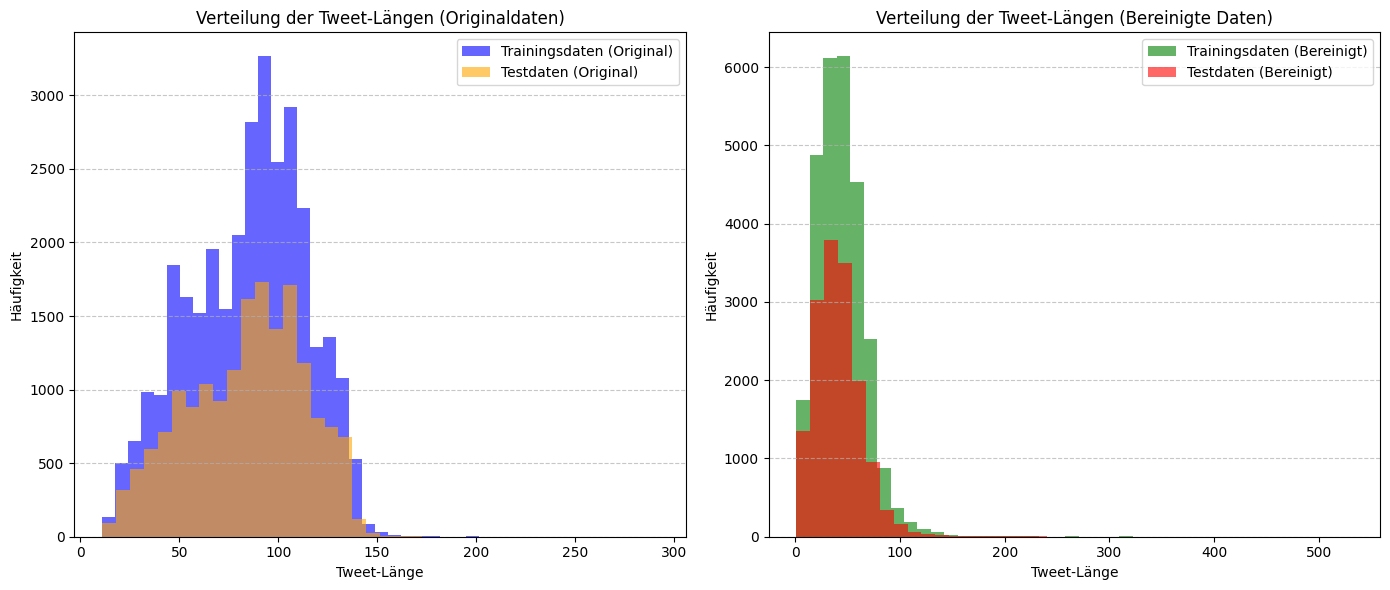

In [12]:
# Erstellung der Subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Originaldaten
plt.subplot(1, 2, 1)
plt.hist(train_data_len, bins=40, alpha=0.6, label='Trainingsdaten (Original)', color='blue')
plt.hist(test_data_len, bins=40, alpha=0.6, label='Testdaten (Original)', color='orange')
plt.title('Verteilung der Tweet-Längen (Originaldaten)')
plt.xlabel('Tweet-Länge')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Bereinigte Daten
plt.subplot(1, 2, 2)
plt.hist(train_cleaned_data_len, bins=40, alpha=0.6, label='Trainingsdaten (Bereinigt)', color='green')
plt.hist(test_cleaned_data_len, bins=40, alpha=0.6, label='Testdaten (Bereinigt)', color='red')
plt.title('Verteilung der Tweet-Längen (Bereinigte Daten)')
plt.xlabel('Tweet-Länge')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout-Anpassung und Anzeige
plt.tight_layout()
plt.show()


#### Analyse der Wörter in Tweets

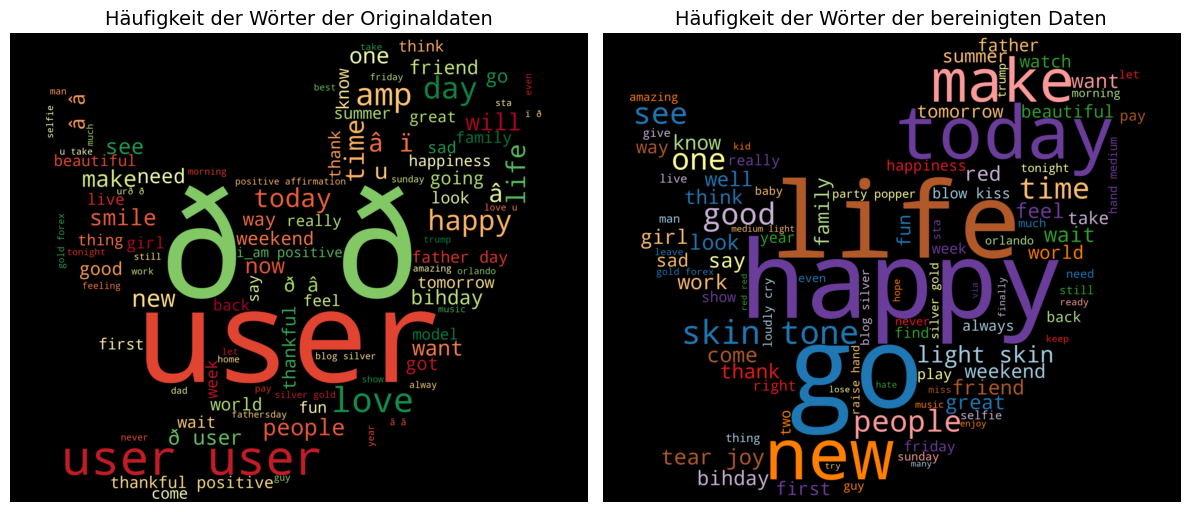

In [13]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_mask = np.array(Image.open("twitter.png"))

df_origin['tweet'] = df_origin['tweet'].apply(lambda x: x if isinstance(x, str) else '')
#origin_text = " ".join(tweet for tweet in df_origin['tweet'])

# Verarbeitung der Daten aus df_cleaned
df_cleaned['tweet_cleaned'] = df_cleaned['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')
#cleaned_text = " ".join(tweet for tweet in df_cleaned['tweet_cleaned'])

dataset_1_text = " ".join(df_origin["tweet"].tolist())  
dataset_2_text = " ".join(df_cleaned["tweet_cleaned"].tolist())  

plt.figure(figsize=(12, 6)) 

# Subplot 1: Dataset 1
plt.subplot(1, 2, 1)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(dataset_1_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der Wörter der Originaldaten", fontsize=14)  

# Subplot 2: Dataset 2
plt.subplot(1, 2, 2)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(dataset_2_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der Wörter der bereinigten Daten", fontsize=14)  


plt.tight_layout()
plt.show()


#### Analyse der Wörter in Hate Speech Tweets

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_12020\1662399070.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin_label_1['tweet'] = df_origin_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')
C:\Users\Nasiba\AppData\Local\Temp\ipykernel_12020\1662399070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_label_1['tweet_cleaned'] = df_cleaned_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')


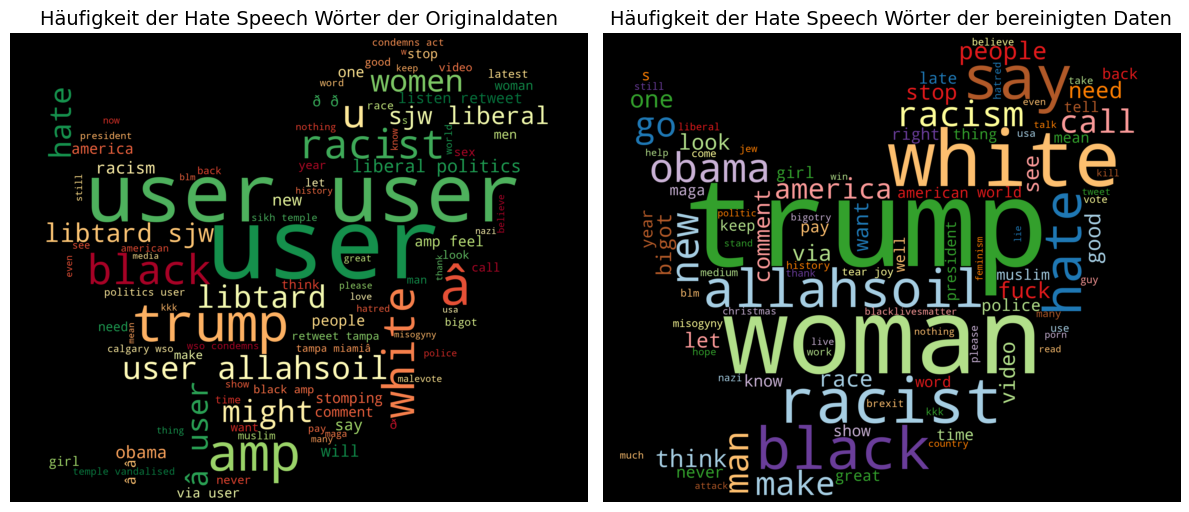

In [14]:
wordcloud_mask = np.array(Image.open("twitter.png"))

df_origin_label_1= df_origin[df_origin['label']==1]
df_cleaned_label_1= df_cleaned[df_cleaned['label']==1]


df_origin_label_1['tweet'] = df_origin_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')

df_cleaned_label_1['tweet_cleaned'] = df_cleaned_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')

dataset_1_text = " ".join(df_origin_label_1["tweet"].tolist())  
dataset_2_text = " ".join(df_cleaned_label_1["tweet_cleaned"].tolist())  

plt.figure(figsize=(12, 6)) 

# Subplot 1: Dataset 1
plt.subplot(1, 2, 1)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(dataset_1_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der Hate Speech Wörter der Originaldaten", fontsize=14)  

# Subplot 2: Dataset 2
plt.subplot(1, 2, 2)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(dataset_2_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der Hate Speech Wörter der bereinigten Daten", fontsize=14)  


plt.tight_layout()
plt.show()


#### Hashtag Analyse

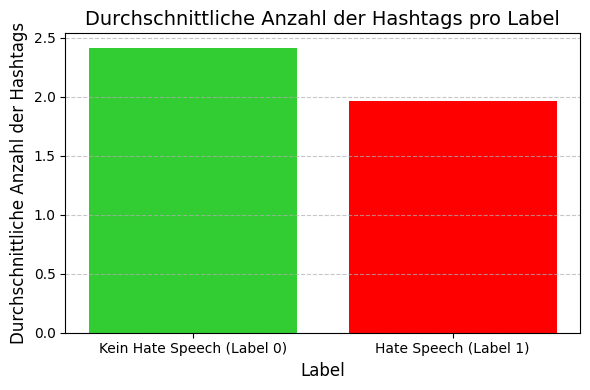

Durchschnittliche Anzahl der Hashtags in 'Kein Hate Speech' Tweets: 2.42
Durchschnittliche Anzahl der Hashtags in 'Hate Speech' Tweets: 1.96


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Gruppieren der Daten basierend auf dem Label und Berechnung der durchschnittlichen Anzahl der Hashtags

df_cleaned_new = df_cleaned.copy()
df_cleaned_new['num_hashtags'] = df_cleaned_new['hashtags'].apply(lambda x: len(eval(x)) if isinstance(x, str) and x.startswith('[') else 0)

avg_hashtags = df_cleaned_new.groupby('label')['num_hashtags'].mean()

# Erstellen eines Barplots
plt.figure(figsize=(6, 4))
plt.bar(['Kein Hate Speech (Label 0)', 'Hate Speech (Label 1)'], avg_hashtags, color=['limegreen', 'red'])
plt.title('Durchschnittliche Anzahl der Hashtags pro Label', fontsize=14)
plt.ylabel('Durchschnittliche Anzahl der Hashtags', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Anzeige des Ergebnisses
plt.tight_layout()
plt.show()

# Ausgabe der genauen Werte zur Unterstützung der Analyse
print(f"Durchschnittliche Anzahl der Hashtags in 'Kein Hate Speech' Tweets: {avg_hashtags[0]:.2f}")
print(f"Durchschnittliche Anzahl der Hashtags in 'Hate Speech' Tweets: {avg_hashtags[1]:.2f}")


C:\Users\Nasiba\AppData\Local\Temp\ipykernel_12020\3782159774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_label_0['hashtags'] = df_cleaned_label_0['hashtags'].apply(lambda x: x if isinstance(x, str) else '')
C:\Users\Nasiba\AppData\Local\Temp\ipykernel_12020\3782159774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_label_1['hashtags'] = df_cleaned_label_1['hashtags'].apply(lambda x: x if isinstance(x, str) else '')


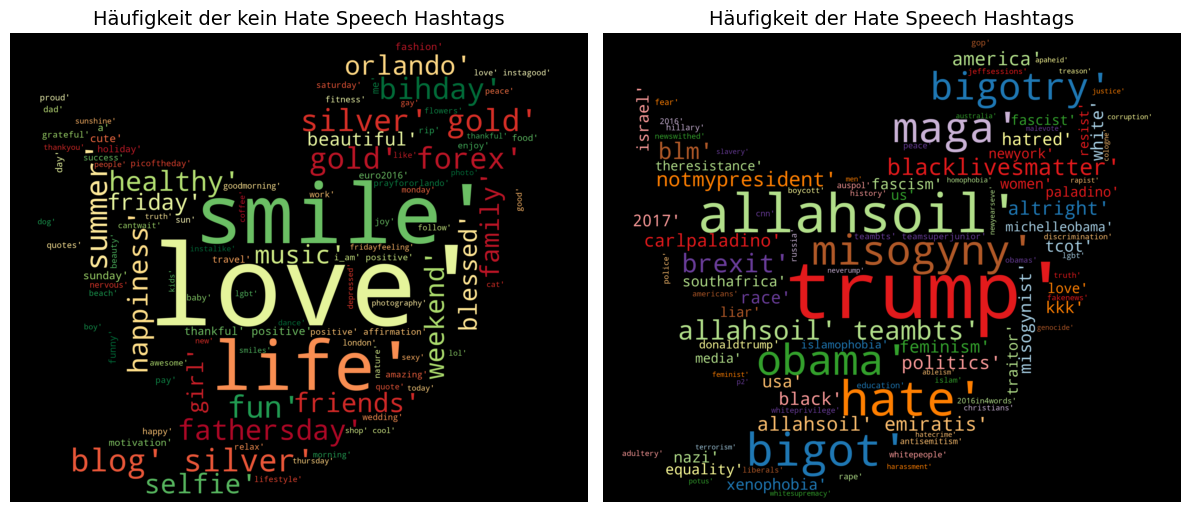

In [16]:
wordcloud_mask = np.array(Image.open("twitter.png"))

df_cleaned_label_0= df_cleaned[df_cleaned['label']==0]
df_cleaned_label_1= df_cleaned[df_cleaned['label']==1]


df_cleaned_label_0['hashtags'] = df_cleaned_label_0['hashtags'].apply(lambda x: x if isinstance(x, str) else '')

df_cleaned_label_1['hashtags'] = df_cleaned_label_1['hashtags'].apply(lambda x: x if isinstance(x, str) else '')

dataset_1_text = " ".join(df_cleaned_label_0["hashtags"].tolist())  
dataset_2_text = " ".join(df_cleaned_label_1["hashtags"].tolist())  

plt.figure(figsize=(12, 6)) 

# Subplot 1: Dataset 1
plt.subplot(1, 2, 1)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(dataset_1_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der kein Hate Speech Hashtags", fontsize=14)  

# Subplot 2: Dataset 2
plt.subplot(1, 2, 2)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(dataset_2_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der Hate Speech Hashtags", fontsize=14)  


plt.tight_layout()
plt.show()


### Anzahl von Mentions und Hashtags pro Tweet

In [17]:

df_cleaned_new['num_mentions'] = df_cleaned_new['tweet'].apply(lambda x: x.count('@'))
df_cleaned_new['num_hashtags'] = df_cleaned_new['tweet'].apply(lambda x: x.count('#'))

df_cleaned_new['num_mentions'] = df_cleaned_new['tweet'].apply(lambda x: x.count('@'))
df_cleaned_new['num_hashtags'] = df_cleaned_new['tweet'].apply(lambda x: x.count('#'))

mentions_stats = {
    "Mean Mentions": df_cleaned_new['num_mentions'].mean(),
    "Median Mentions": df_cleaned_new['num_mentions'].median(),
    "Max Mentions": df_cleaned_new['num_mentions'].max(),
    "Min Mentions": df_cleaned_new['num_mentions'].min(),
    "Total Mentions": df_cleaned_new['num_mentions'].sum()
}

hashtags_stats = {
    "Mean Hashtags": df_cleaned_new['num_hashtags'].mean(),
    "Median Hashtags": df_cleaned_new['num_hashtags'].median(),
    "Max Hashtags": df_cleaned_new['num_hashtags'].max(),
    "Min Hashtags": df_cleaned_new['num_hashtags'].min(),
    "Total Hashtags": df_cleaned_new['num_hashtags'].sum()
}

print("Statistics for Mentions (@):")
for key, value in mentions_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

print("\nStatistics for Hashtags (#):")
for key, value in hashtags_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")


Statistics for Mentions (@):
Mean Mentions: 0.59
Median Mentions: 0.00
Max Mentions: 10
Min Mentions: 0
Total Mentions: 16248

Statistics for Hashtags (#):
Mean Hashtags: 2.40
Median Hashtags: 2.00
Max Hashtags: 20
Min Hashtags: 0
Total Hashtags: 66356


C:\Users\Nasiba\AppData\Local\Temp\ipykernel_12020\322232222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_label_1['num_mentions'] = df_cleaned_label_1['tweet'].apply(lambda x: x.count('@'))


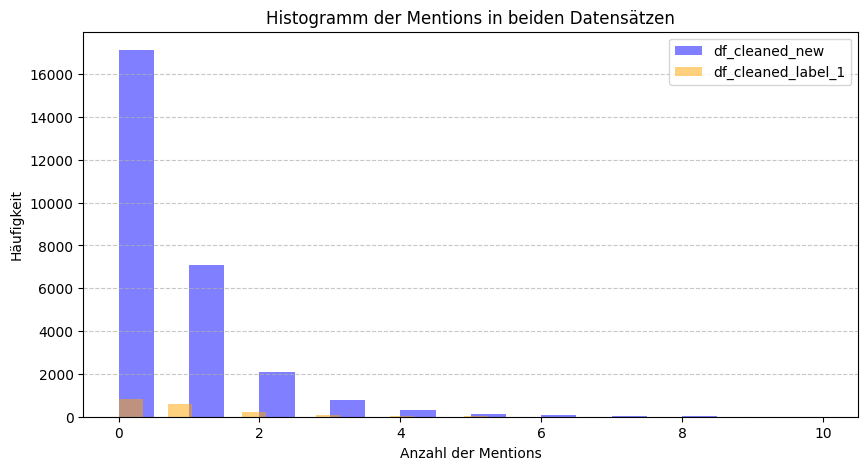

In [18]:

df_cleaned_new['num_mentions'] = df_cleaned_new['tweet'].apply(lambda x: x.count('@'))
df_cleaned_label_1['num_mentions'] = df_cleaned_label_1['tweet'].apply(lambda x: x.count('@'))


plt.figure(figsize=(10, 5))

# Histogramm für df_cleaned_new
plt.hist(df_cleaned_new['num_mentions'], bins=20, alpha=0.5, label='df_cleaned_new', color='blue')

# Histogramm für df_cleaned_label_1
plt.hist(df_cleaned_label_1['num_mentions'], bins=20, alpha=0.5, label='df_cleaned_label_1', color='orange')

plt.xlabel("Anzahl der Mentions")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Mentions in beiden Datensätzen")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [19]:
df_cleaned.head(5)

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father selfish drag kid run,1,['#run'],NaN
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use cause offer van,2,"['#lyft', '#disapointed', '#getthanked']",NaN
2,3,0,bihday your majesty,bihday majesty,0,[],NaN
3,4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model take time mobile phone kissing sunglass mouth tongue sweat droplet sweat droplet sweat droplet,0,['#model'],":mobile_phone:,:kissing_face_with_smiling_eyes:,:smiling_face_with_sunglasses:,:mouth:,:tongue:,:sweat_droplets:,:sweat_droplets:,:sweat_droplets:"
4,5,0,factsguide: society now #motivation,factsguide society motivation,0,['#motivation'],NaN
